In [1]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt

/home/c2sy/anaconda3/envs/MDAnalysis/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def Density_Profile(topology, trajectory, profile="protein"):
    
    u = mda.Universe(topology, trajectory)

    proteins = u.select_atoms("protein")
    num_proteins = len(proteins.segments)

    peg400 = u.select_atoms("resname PEG")
    num_peg = len(peg400.segments)

    num_bins = 200
    z_min = 0
    z_max = u.dimensions[2]
    bin_edges = np.linspace(z_min, z_max, num_bins+1)
    bin_volume = np.prod(u.dimensions[:3])*0.001
    bin_centers = 0.5 * (bin_edges[1:]+bin_edges[:-1])*0.1

    protein_density_collector = np.zeros(num_bins)
    peg_density_collector = np.zeros(num_bins)

    for ts in u.trajectory:
        protein_zcoordinates = proteins.positions[:,2]
        peg_zcoordinates = peg400.positions[:,2]

        protein_hist, _ = np.histogram(protein_zcoordinates, bins=bin_edges)
        peg_hist, _ = np.histogram(peg_zcoordinates, bins=bin_edges)

        protein_density_collector += protein_hist
        peg_density_collector += peg_hist

    num_frames = u.trajectory.n_frames

    avg_protein_density = protein_density_collector/num_frames
    protein_num_density = avg_protein_density/bin_volume

    avg_peg_density = peg_density_collector/num_frames
    peg_num_density = avg_peg_density/bin_volume

    if profile == "protein":
        return protein_num_density, bin_centers 
    elif profile == "PEG":
        return peg_num_density, bin_centers


# Desnsity profiles of NHP6A unfolded with PEG400

/home/c2sy/anaconda3/envs/MDAnalysis/lib/python3.13/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"
/home/c2sy/anaconda3/envs/MDAnalysis/lib/python3.13/site-packages/MDAnalysis/topology/PDBParser.py:223: UserWarning: CONECT records was corrupt, bonds will not be parsed
  warnings.warn("CONECT records was corrupt, "


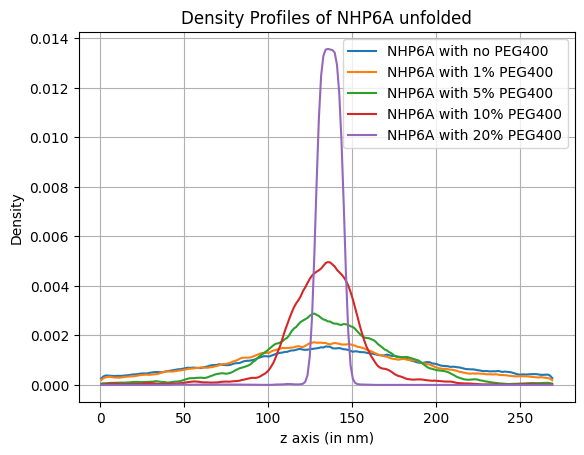

In [3]:
unfolded_0PEG400, z_axis = Density_Profile("NHP6A_unfolded_0PEG400.pdb", "NHP6A_unfolded_0PEG400.dcd", profile="protein")
unfolded_1PEG400, _ = Density_Profile("NHP6A_unfolded_1PEG400.pdb", "NHP6A_unfolded_1PEG400.dcd", profile="protein")
unfolded_5PEG400, _ = Density_Profile("NHP6A_unfolded_5PEG400.pdb", "NHP6A_unfolded_5PEG400.dcd", profile="protein")
unfolded_10PEG400, _ = Density_Profile("NHP6A_unfolded_10PEG400.pdb", "NHP6A_unfolded_10PEG400.dcd", profile="protein")
unfolded_20PEG400, _ = Density_Profile("NHP6A_unfolded_20PEG400.pdb", "NHP6A_unfolded_20PEG400.dcd", profile="protein")

plt.plot(z_axis, unfolded_0PEG400, label="NHP6A with no PEG400")
plt.plot(z_axis, unfolded_1PEG400, label="NHP6A with 1% PEG400")
plt.plot(z_axis, unfolded_5PEG400, label="NHP6A with 5% PEG400")
plt.plot(z_axis, unfolded_10PEG400, label="NHP6A with 10% PEG400")
plt.plot(z_axis, unfolded_20PEG400, label="NHP6A with 20% PEG400")

plt.xlabel("z axis (in nm)")
plt.ylabel("Density")
plt.title("Density Profiles of NHP6A unfolded")
plt.grid(True)
plt.legend()
plt.show()

# Density profiles of NHP6A helical with PEG400

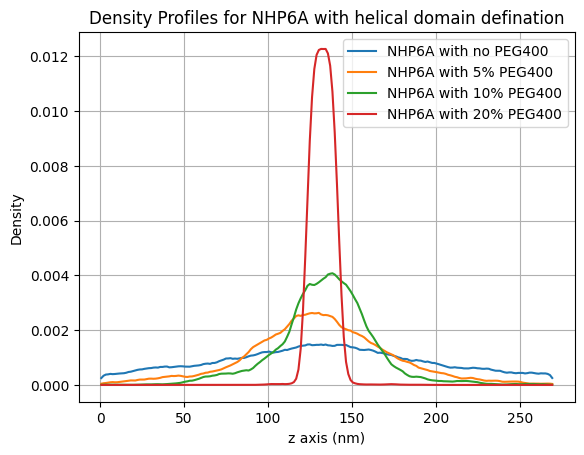

In [4]:
helical_0PEG400, _ = Density_Profile("NHP6A_helical_0PEG400.pdb", "NHP6A_helical_0PEG400.dcd", profile="protein")
helical_5PEG400, _ = Density_Profile("NHP6A_helical_5PEG400.pdb", "NHP6A_helical_5PEG400.dcd", profile="protein")
helical_10PEG400, _ = Density_Profile("NHP6A_helical_10PEG400.pdb", "NHP6A_helical_10PEG400.dcd", profile="protein")
helical_20PEG400, _ = Density_Profile("NHP6A_helical_20PEG400.pdb", "NHP6A_helical_20PEG400.dcd", profile="protein")

plt.plot(z_axis, helical_0PEG400, label="NHP6A with no PEG400")
plt.plot(z_axis, helical_5PEG400, label="NHP6A with 5% PEG400")
plt.plot(z_axis, helical_10PEG400, label="NHP6A with 10% PEG400")
plt.plot(z_axis, helical_20PEG400, label="NHP6A with 20% PEG400")

plt.xlabel("z axis (nm)")
plt.ylabel("Density")
plt.title("Density Profiles for NHP6A with helical domain defination")
plt.legend()
plt.grid(True)
plt.show()

# Density Profiles of NHP6A with folded domain

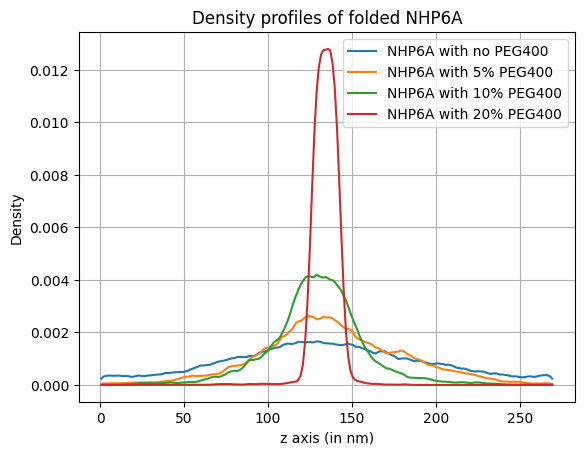

In [5]:
folded_0PEG400, z_axis = Density_Profile("NHP6A_folded_0PEG400.pdb", "NHP6A_folded_0PEG400.dcd", profile="protein")
folded_5PEG400, _ = Density_Profile("NHP6A_folded_5PEG400.pdb", "NHP6A_folded_5PEG400.dcd", profile="protein")
folded_10PEG400, _ = Density_Profile("NHP6A_folded_10PEG400.pdb", "NHP6A_folded_10PEG400.dcd", profile="protein")
folded_20PEG400, _ = Density_Profile("NHP6A_folded_20PEG400.pdb", "NHP6A_folded_20PEG400.dcd", profile="protein")

plt.plot(z_axis, folded_0PEG400, label="NHP6A with no PEG400")
plt.plot(z_axis, folded_5PEG400, label="NHP6A with 5% PEG400")
plt.plot(z_axis, folded_10PEG400, label="NHP6A with 10% PEG400")
plt.plot(z_axis, folded_20PEG400, label="NHP6A with 20% PEG400")


plt.xlabel("z axis (in nm)")
plt.ylabel("Density")
plt.title("Density profiles of folded NHP6A")
plt.legend()
plt.grid(True)
plt.show()

# Comparison 

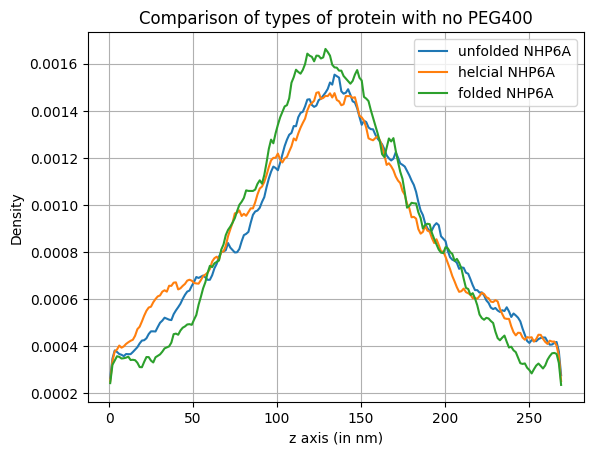

In [6]:
plt.plot(z_axis, unfolded_0PEG400, label="unfolded NHP6A")
plt.plot(z_axis, helical_0PEG400, label="helcial NHP6A")
plt.plot(z_axis, folded_0PEG400, label="folded NHP6A")

plt.xlabel("z axis (in nm)")
plt.ylabel("Density")
plt.title("Comparison of types of protein with no PEG400")
plt.legend()
plt.grid(True)
plt.show()

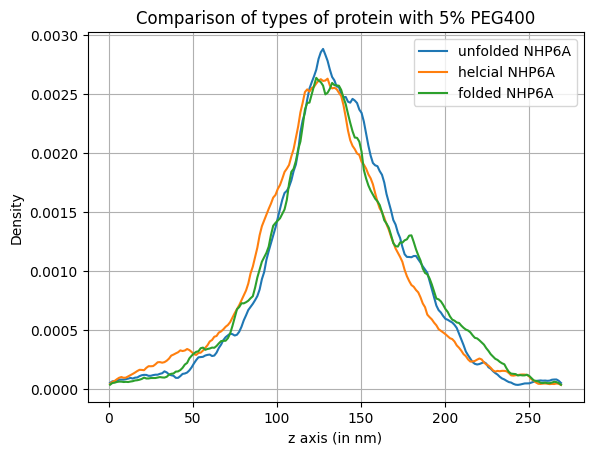

In [7]:
plt.plot(z_axis, unfolded_5PEG400, label="unfolded NHP6A")
plt.plot(z_axis, helical_5PEG400, label="helcial NHP6A")
plt.plot(z_axis, folded_5PEG400, label="folded NHP6A")

plt.xlabel("z axis (in nm)")
plt.ylabel("Density")
plt.title("Comparison of types of protein with 5% PEG400")
plt.legend()
plt.grid(True)
plt.show()

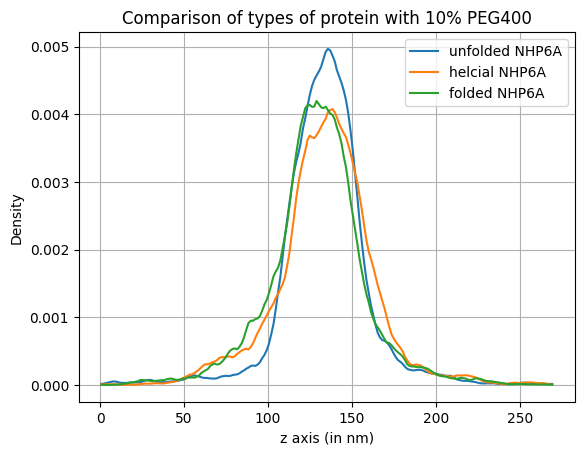

In [8]:
plt.plot(z_axis, unfolded_10PEG400, label="unfolded NHP6A")
plt.plot(z_axis, helical_10PEG400, label="helcial NHP6A")
plt.plot(z_axis, folded_10PEG400, label="folded NHP6A")

plt.xlabel("z axis (in nm)")
plt.ylabel("Density")
plt.title("Comparison of types of protein with 10% PEG400")
plt.legend()
plt.grid(True)
plt.show()

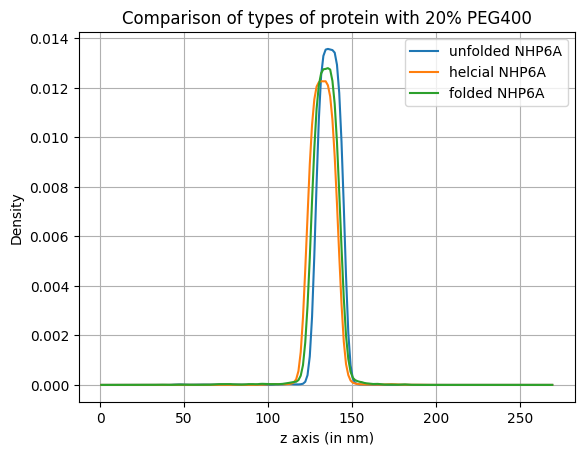

In [9]:
plt.plot(z_axis, unfolded_20PEG400, label="unfolded NHP6A")
plt.plot(z_axis, helical_20PEG400, label="helcial NHP6A")
plt.plot(z_axis, folded_20PEG400, label="folded NHP6A")

plt.xlabel("z axis (in nm)")
plt.ylabel("Density")
plt.title("Comparison of types of protein with 20% PEG400")
plt.legend()
plt.grid(True)
plt.show()

# NHP6A with PEG8000

## Unfolded

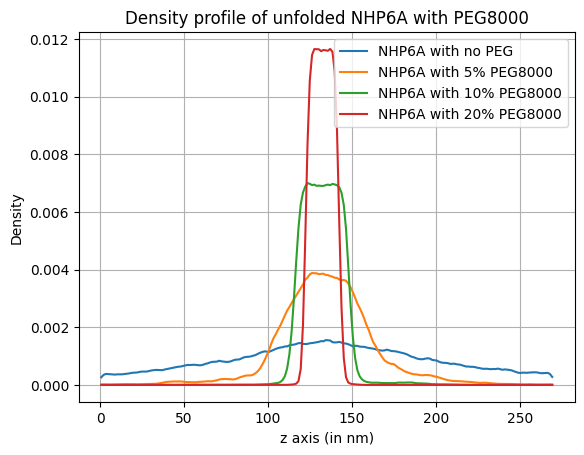

In [17]:
unfolded_5PEG8000, _ = Density_Profile("NHP6A_unfolded_5PEG8000.pdb", "NHP6A_unfolded_5PEG8000.dcd", profile="protein")
unfolded_10PEG8000, _ = Density_Profile("NHP6A_unfolded_10PEG8000.pdb", "NHP6A_unfolded_10PEG8000.dcd", profile="protein")
unfolded_20PEG8000, _ = Density_Profile("NHP6A_unfolded_20PEG8000.pdb", "NHP6A_unfolded_20PEG8000.dcd", profile="protein")

plt.plot(z_axis, unfolded_0PEG400, label="NHP6A with no PEG")
plt.plot(z_axis, unfolded_5PEG8000, label="NHP6A with 5% PEG8000")
plt.plot(z_axis, unfolded_10PEG8000, label="NHP6A with 10% PEG8000")
plt.plot(z_axis, unfolded_20PEG8000, label="NHP6A with 20% PEG8000")

plt.xlabel("z axis (in nm)")
plt.ylabel("Density")
plt.title("Density profile of unfolded NHP6A with PEG8000")
plt.legend()
plt.grid(True)
plt.show()

# Comparison between PEGs

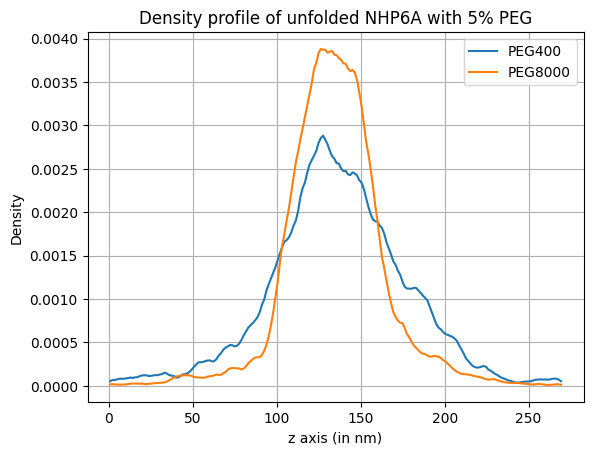

In [13]:
plt.plot(z_axis, unfolded_5PEG400, label="PEG400")
plt.plot(z_axis, unfolded_5PEG8000, label="PEG8000")

plt.xlabel("z axis (in nm)")
plt.ylabel("Density")
plt.title("Density profile of unfolded NHP6A with 5% PEG")
plt.legend()
plt.grid(True)
plt.show()

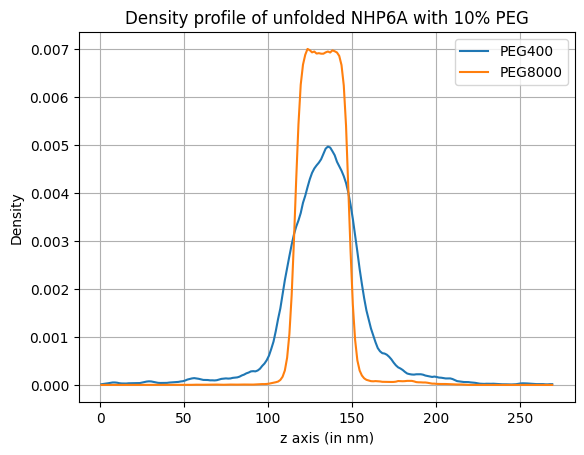

In [14]:
plt.plot(z_axis, unfolded_10PEG400, label="PEG400")
plt.plot(z_axis, unfolded_10PEG8000, label="PEG8000")

plt.xlabel("z axis (in nm)")
plt.ylabel("Density")
plt.title("Density profile of unfolded NHP6A with 10% PEG")
plt.legend()
plt.grid(True)
plt.show()

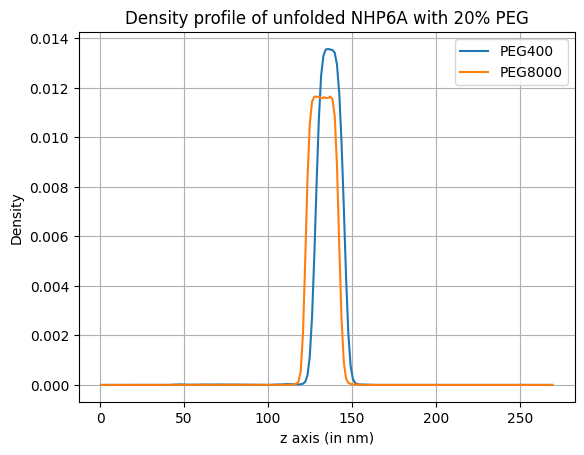

In [16]:
plt.plot(z_axis, unfolded_20PEG400, label="PEG400")
plt.plot(z_axis, unfolded_20PEG8000, label="PEG8000")

plt.xlabel("z axis (in nm)")
plt.ylabel("Density")
plt.title("Density profile of unfolded NHP6A with 20% PEG")
plt.legend()
plt.grid(True)
plt.show()